In [1]:
import os
import glob as glob
import timecorr as tc
import hypertools as hyp
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.decomposition import PCA, IncrementalPCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import timecorr as tc
from timecorr.helpers import isfc, wisfc, mean_combine, corrmean_combine
import supereeg as se
import hypertools as hyp

In [2]:
def rbf(centers, widths, locs):
    """
    Radial basis function
    Parameters
    ----------
    centers : ndarray
        rbf coordinates (one row per RBF)
    widths : ndarray
        RBF radii
    locs : ndarray
        locations to evaluate the RBFs (one row per location)
        
    Returns
    ----------
    results : ndarray
        Matrix of RBF weights for each RBF (row), at each location (column)
    """    
    weights = np.exp(np.divide(-cdist(locs, centers, metric='euclidean') ** 2, np.tile(np.array(widths, ndmin=2), [locs.shape[0], 1])))
    return weights.T

In [3]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)

In [71]:
def reduce_list(x, model):
    split = np.cumsum([len(xi) for xi in x])[:-1]
    x_r = np.vsplit(model.fit_transform(np.vstack(x)), split)
    if len(x) > 1:
        return [xi for xi in x_r]
    else:
        return [x_r[0]]

In [4]:
datadir = os.path.join(os.getenv('HOME'), 'Desktop', 'pca_env', 'pca_paper', 'pieman', 'data')


In [5]:
figdir = '../figs'
if not os.path.exists(figdir):
    os.mkdir(figdir)

In [6]:
neurosynth_dir ='../figs/neurosynth_data/'
if not os.path.exists(neurosynth_dir):
    os.mkdir(neurosynth_dir)

In [7]:
n_f_dir = os.path.join(neurosynth_dir, 'figs')
if not os.path.exists(n_f_dir):
    os.mkdir(n_f_dir)
nii_dir = os.path.join(neurosynth_dir, 'niis')
if not os.path.exists(nii_dir):
    os.mkdir(nii_dir)
txt_dir = os.path.join(neurosynth_dir, 'txts')
if not os.path.exists(txt_dir):
    os.mkdir(txt_dir)
p_txt_dir = os.path.join(txt_dir, 'parsed_txts')
if not os.path.exists(p_txt_dir):
    os.mkdir(p_txt_dir)

In [8]:
ddir = '../../data/'

In [9]:
#figdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/figs'

In [10]:
#results_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results')
results_dir = os.path.join('../../data/', 'results')

In [11]:
posterior = loadmat(os.path.join(ddir, 'pieman_posterior_K700.mat'))
centers = posterior['posterior']['centers'][0][0][0][0][0]
widths = np.array(list(posterior['posterior']['widths'][0][0][0][0][0][:, 0].T))

In [277]:
factors=700

In [278]:
if factors == 100:
    pieman_name = '../../data/pieman_ica100.mat'
else:
    pieman_name = '../../data/pieman_data.mat'

pieman_conds = ['intact', 'paragraph', 'word', 'rest']

In [279]:
pieman_data = loadmat(pieman_name)

In [280]:
debug = False

In [281]:
if debug:
    data = []
    conds = []
    for c in pieman_conds:
        next_data = list(map(lambda i: pieman_data[c][:, i][0][:30, :10], np.where(np.arange(pieman_data[c].shape[1]) != 3)[0]))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

else:

    data = []
    conds = []
    for c in pieman_conds:
        if c == 'paragraph':
            if factors == 700:
                next_data = list(map(lambda i: pieman_data[c][:, i][0], np.where(np.arange(pieman_data[c].shape[1]) != 3)[0]))
            else:
                next_data = list(map(lambda i: pieman_data[c][:, i][0], np.where(np.arange(pieman_data[c].shape[1]) != 0)[0]))
        else:
            next_data = list(map(lambda i: pieman_data[c][:, i][0], np.arange(pieman_data[c].shape[1])))
        data.extend(next_data)
        conds.extend([c]*len(next_data))
    del pieman_data

In [282]:
data = np.array(data)
conds = np.array(conds)

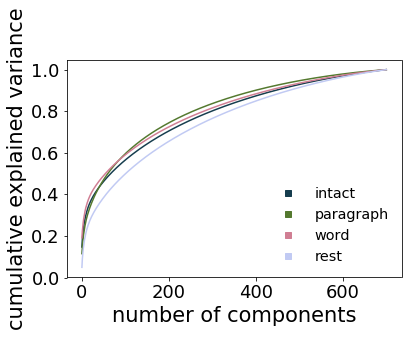

In [310]:
conditions = ['intact', 'paragraph', 'word', 'rest']
colors = sns.color_palette("cubehelix", 4)

for e, c in enumerate(conditions):
    x = list(data[conds == c])
    split = np.cumsum([len(xi) for xi in x])[:-1]

    pca = IncrementalPCA(n_components=np.shape(x)[2])
    x_r = np.vsplit(pca.fit_transform(np.vstack(x)), split)

    plt.plot(np.cumsum(pca.explained_variance_ratio_), color = colors[e])
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
legend = plt.legend([f("s", colors[i]) for i in range(4)], conditions, loc=4, framealpha=1, frameon=False, fontsize = 'x-large')


In [27]:
lower_d_data.shape

(300, 1)

In [116]:
template = se.helpers._gray(res=2)

In [157]:
net_inds = largest_indices(np.atleast_2d(approximation_combined).mean(axis=1), 10)

In [169]:
largest_indices(np.atleast_2d(approximation_combined).mean(axis=1), 10)

(array([  0, 296, 154, 297, 153, 295, 155, 156, 292, 293]),)

In [183]:
zscore_approx = (approximation_combined -approximation_combined.min())/approximation_combined.max()

In [211]:
pca = IncrementalPCA(n_components=i)
x_r = np.vsplit(pca.fit_transform(np.vstack(x)), split)

In [214]:
np.shape(x_r)

(36, 300, 100)

In [215]:
combined_pca = np.mean(np.stack(x_r, axis=2), axis=2)

In [216]:
combined_pca.shape

(300, 100)

In [217]:
approximation_combined = pca.inverse_transform(combined_pca)

In [218]:
approximation_combined.shape

(300, 700)

In [240]:
net_inds = largest_indices(pca.components_, 10)

In [263]:
pca.components_[0]

array([ 0.04654633,  0.02300666,  0.03894667,  0.05249323,  0.04780712,
        0.05342559,  0.04019468,  0.03637367,  0.03338092,  0.02580726,
        0.03279041,  0.05133797,  0.03012536,  0.04309627,  0.03337841,
        0.03797132,  0.03372058,  0.02692561,  0.04537989,  0.04021398,
        0.040736  ,  0.02533104,  0.03215298,  0.03742339,  0.04913715,
        0.04766571,  0.03587082,  0.03638612,  0.02248907,  0.04165103,
        0.01612927,  0.04064448,  0.04019148,  0.04745706,  0.04485034,
        0.03348356,  0.04261864,  0.0309309 ,  0.03963822,  0.02839631,
        0.04684555,  0.0271084 ,  0.04918106,  0.04082736,  0.03694437,
        0.04239906,  0.03240106,  0.01234637,  0.04133611,  0.03989995,
        0.01713437,  0.02334878,  0.04833626,  0.05709361,  0.03719619,
        0.04703896,  0.04569781,  0.04810564,  0.04244254,  0.02507456,
        0.04521274,  0.02979366,  0.04276425,  0.03520005,  0.04850708,
        0.03697559,  0.0179493 ,  0.02405711,  0.04311686,  0.03

In [246]:
net_inds = largest_indices(pca.components_[i], 10)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [258]:
np.round(pca.explained_variance_ratio_[0],2)

0.19

Condition = intact; PCA = 1; Variance explained = 0.15


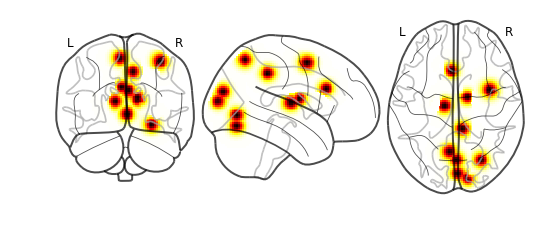

Condition = intact; PCA = 2; Variance explained = 0.04


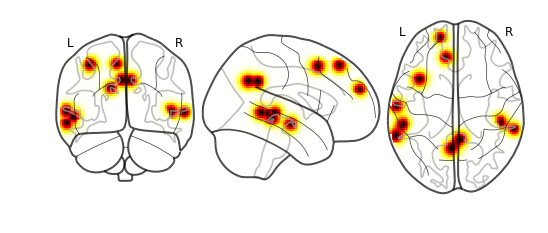

Condition = intact; PCA = 3; Variance explained = 0.02


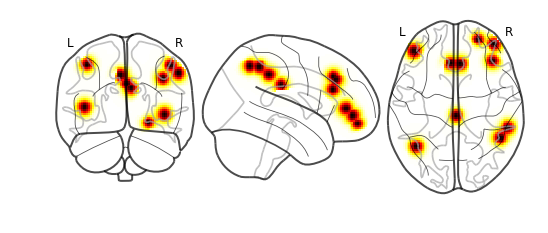

Condition = intact; PCA = 4; Variance explained = 0.02


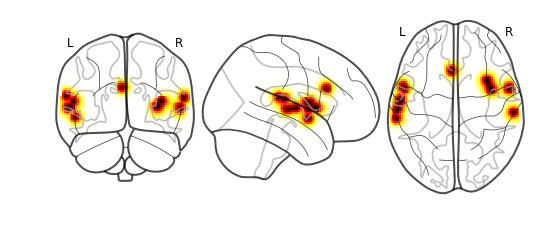

Condition = intact; PCA = 5; Variance explained = 0.01


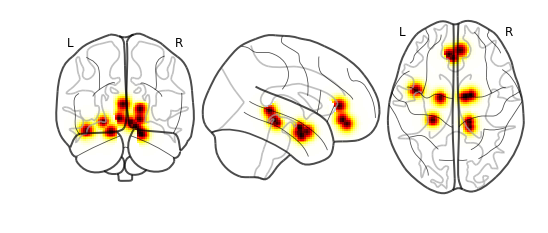

Condition = paragraph; PCA = 1; Variance explained = 0.12


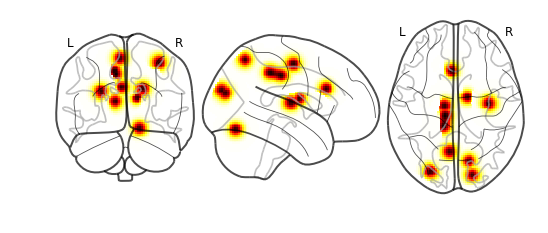

Condition = paragraph; PCA = 2; Variance explained = 0.03


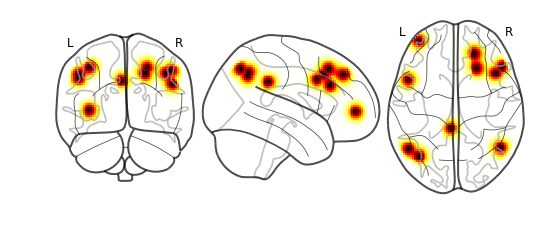

Condition = paragraph; PCA = 3; Variance explained = 0.03


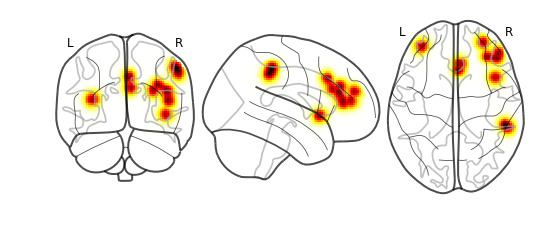

Condition = paragraph; PCA = 4; Variance explained = 0.02


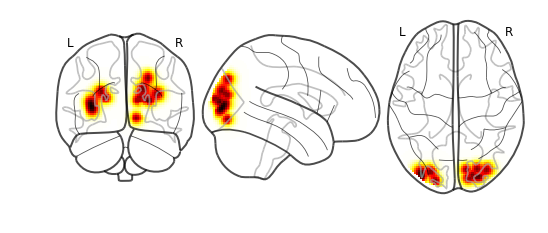

Condition = paragraph; PCA = 5; Variance explained = 0.02


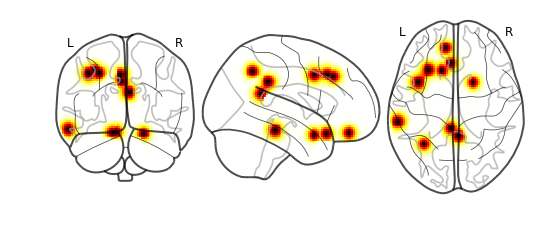

Condition = rest; PCA = 1; Variance explained = 0.05


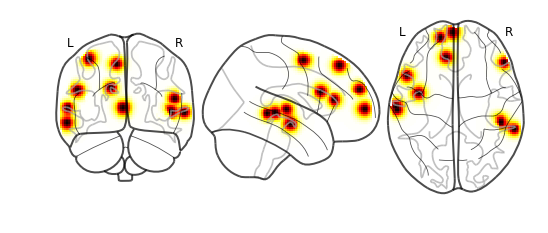

Condition = rest; PCA = 2; Variance explained = 0.04


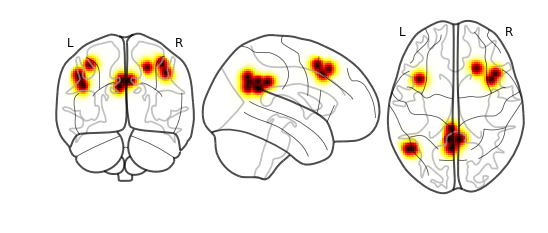

Condition = rest; PCA = 3; Variance explained = 0.03


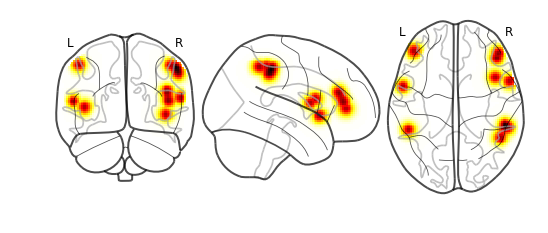

Condition = rest; PCA = 4; Variance explained = 0.02


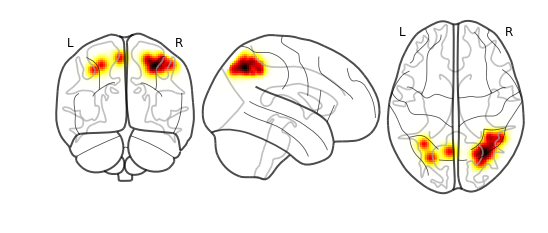

Condition = rest; PCA = 5; Variance explained = 0.02


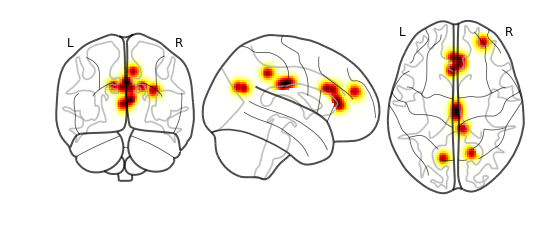

Condition = word; PCA = 1; Variance explained = 0.19


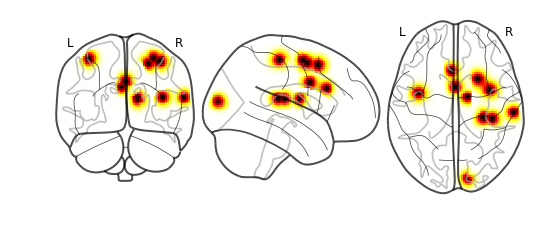

Condition = word; PCA = 2; Variance explained = 0.03


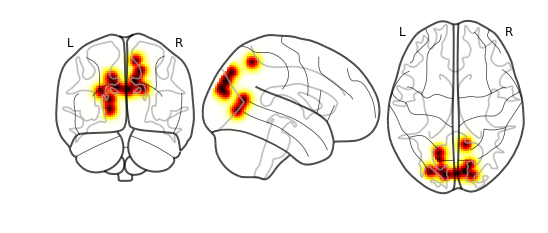

Condition = word; PCA = 3; Variance explained = 0.02


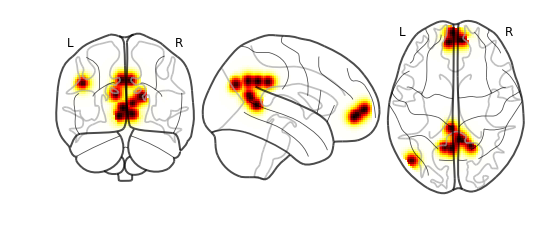

Condition = word; PCA = 4; Variance explained = 0.02


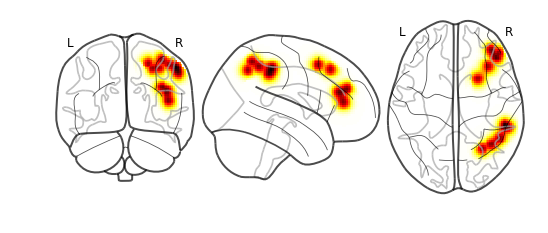

Condition = word; PCA = 5; Variance explained = 0.02


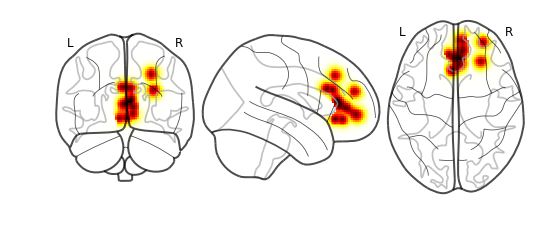

In [259]:
conditions = ['intact', 'paragraph', 'rest', 'word']
#conditions = ['intact']

for c in conditions:
    x = list(data[conds == c])
    split = np.cumsum([len(xi) for xi in x])[:-1]
    
    pca = IncrementalPCA(n_components=10)
    x_r = np.vsplit(pca.fit_transform(np.vstack(x)), split)
    for i in np.arange(5):
        
        plt.show()
        net_inds = largest_indices(pca.components_[i], 10)
        temp_locs = centers[net_inds]
        temp_widths = widths[net_inds]
        w = rbf(temp_locs, temp_widths, template.get_locs().values)
        b = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)
        nii = se.Nifti(b)
        print('Condition = ' + c + '; PCA = ' + str(i+ 1) + '; Variance explained = ' + str(np.round(pca.explained_variance_ratio_[i],2)))
        nii.plot_glass_brain()

In [204]:
net_inds = largest_indices(np.atleast_2d(approximation_combined).mean(axis=0), 10)

In [205]:
net_inds

(array([667, 617, 255, 200, 687,  92, 609, 411, 342, 657]),)

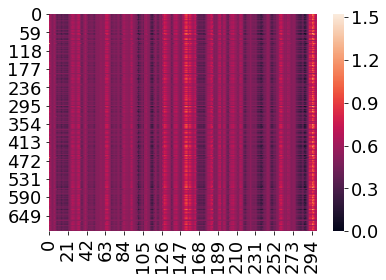

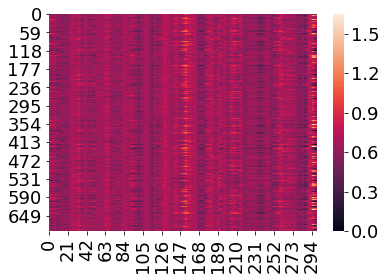

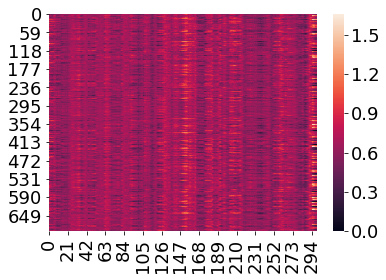

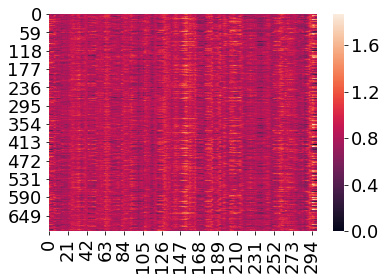

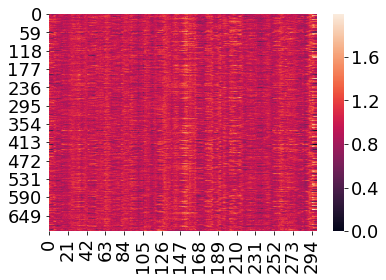

In [210]:
#conditions = ['intact', 'paragraph', 'rest', 'word']
conditions = ['intact']

for c in conditions:
    x = list(data[conds == c])
    split = np.cumsum([len(xi) for xi in x])[:-1]
    
    for i in [1,5,10,20,100]:
        
        pca = IncrementalPCA(n_components=i)
        x_r = np.vsplit(pca.fit_transform(np.vstack(x)), split)

        combined_pca = np.mean(np.stack(x_r, axis=2), axis=2)
        approximation_combined = pca.inverse_transform(combined_pca)
        zscore_approx = (approximation_combined -approximation_combined.min())/approximation_combined.max()
        sns.heatmap(zscore_approx.T)
        plt.show()

#         temp_locs = centers
#         temp_widths = zscore_approx[0]
#         w = rbf(temp_locs, temp_widths, template.get_locs().values)
#         b = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)
#         nii = se.Nifti(b)
#         print('PCA = ' + str(i))
#         nii.plot_glass_brain()

In [ ]:
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

In [ ]:
#conditions = ['intact', 'paragraph', 'rest', 'word']
conditions = ['intact']

for c in conditions:
    x = list(data[conds == c])
    split = np.cumsum([len(xi) for xi in x])[:-1]
    
    for i in [1,5,10,20,100]:
        
        pca = IncrementalPCA(n_components=i)
        x_r = np.vsplit(pca.fit_transform(np.vstack(x)), split)

        combined_pca = np.mean(np.stack(x_r, axis=2), axis=2)
        approximation_combined = pca.inverse_transform(combined_pca)
        zscore_approx = (approximation_combined -approximation_combined.min())/approximation_combined.max()
        sns.heatmap(zscore_approx)
        plt.show()
        #print(largest_indices(np.atleast_2d(approximation_combined).mean(axis=1), 50))
#         net_inds = largest_indices(np.atleast_2d(approximation_combined).mean(axis=1), 10)
#         temp_locs = centers[net_inds]
#         temp_widths = widths[net_inds]
#         w = rbf(temp_locs, temp_widths, template.get_locs().values)
#         b = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)
#         nii = se.Nifti(b)
#         print('PCA = ' + str(i))
#         nii.plot_glass_brain()

In [155]:
conditions = ['intact', 'paragraph', 'rest', 'word']


for c in conditions:

    pca_data = np.asarray(hyp.reduce(list(data[conds == 'intact']), ndims=10))
    pca = IncrementalPCA(n_components=10)
    combined_pca = np.mean(np.stack(pca_data, axis=2), axis=2)
    approximation_combined = pca.inverse_transform(combined_pca)
    for i in np.arange(10):
        net_inds = largest_indices(np.atleast_2d(approximation_combined[i]).mean(axis=0), 10)
        temp_locs = centers[net_inds]
        temp_widths = widths[net_inds]
        w = rbf(temp_locs, temp_widths, template.get_locs().values)
        b = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)
        nii = se.Nifti(b)
        print('PCA = ' + str(i))
        nii.plot_glass_brain()

AttributeError: 'IncrementalPCA' object has no attribute 'components_'

In [92]:
pca_data.shape

(36, 300, 10)

In [154]:
data[conds == 'intact'].shape

(36,)

In [196]:
pca = IncrementalPCA(n_components=4)
lower_d_data = pca.fit_transform(data[conds == 'intact'][0])
#print(pca.explained_variance_ratio_)

In [162]:
pca.components_=combined_pca


In [163]:
pca.inverse_transform(combined_pca)

ValueError: shapes (300,10) and (300,10) not aligned: 10 (dim 1) != 300 (dim 0)

In [145]:
pca_data.shape

(36, 300, 10)

In [139]:
combined_pca = np.mean(np.stack(pca_data, axis=2), axis=2)

In [140]:
combined_pca.shape

(300, 10)

In [142]:
combined_pca[:, 0]

array([ 1.66928816e+01,  4.57535825e+00,  1.58847972e+00,  3.85979409e-01,
       -7.14391562e-01,  2.98872299e-01,  1.99617761e+00,  1.23435327e+00,
       -2.41965525e-02, -2.90924139e+00, -3.88340332e+00, -2.77853377e+00,
       -2.86881709e+00, -3.38983594e+00, -4.91788738e+00, -3.75627543e+00,
       -2.98717570e+00, -3.20277840e+00, -4.00675704e+00, -4.08660567e+00,
       -4.14506517e+00, -4.44991423e+00, -2.08617935e+00, -5.91381121e-01,
        6.51866350e-01,  1.23045882e+00,  2.63078469e+00,  3.56640307e+00,
        3.09900709e+00,  2.16165258e+00,  9.74359583e-01,  1.41250974e+00,
        3.04379450e+00,  4.06629064e+00,  3.97082002e+00,  3.41838923e+00,
       -9.25461460e-02, -2.56960773e+00, -2.33438280e+00, -4.77438690e-01,
        8.16447276e-01,  2.14687043e+00,  5.39900987e-01, -5.11636693e-01,
       -2.03989919e+00, -2.59909307e+00, -2.07238712e+00, -1.84688873e+00,
       -1.61627924e+00, -1.63862718e+00, -2.60745145e+00, -3.34295652e+00,
       -1.23713617e+00, -

In [150]:
#pca = IncrementalPCA(n_components=10)
approximation_combined = pca.inverse_transform(combined_pca)

AttributeError: 'IncrementalPCA' object has no attribute 'components_'

In [122]:
approximation_combined.shape

(700,)

In [118]:
approximation_combined[i].shape

(700,)

PCA = 1


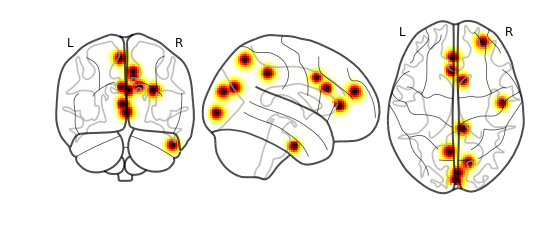

PCA = 2


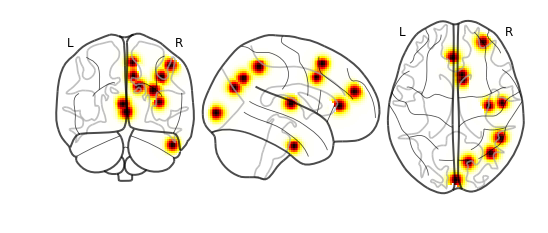

PCA = 3


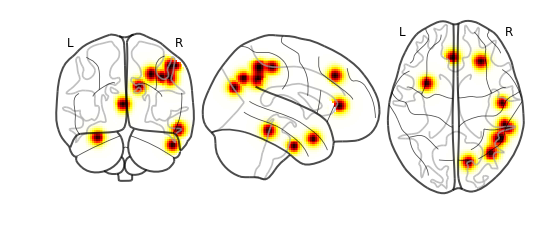

PCA = 4


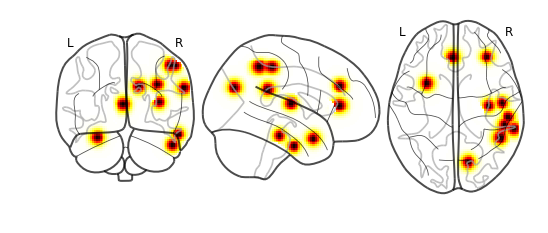

PCA = 5


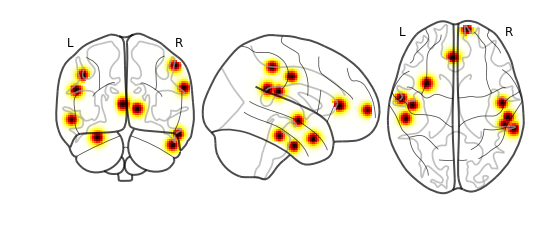

PCA = 6


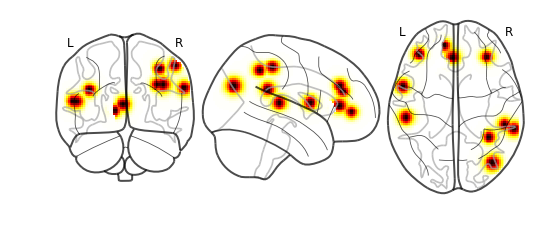

PCA = 7


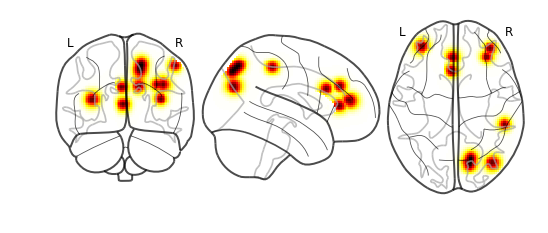

PCA = 8


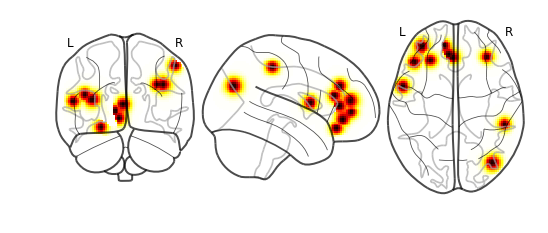

PCA = 9


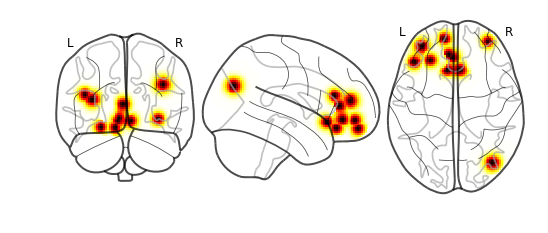

PCA = 10


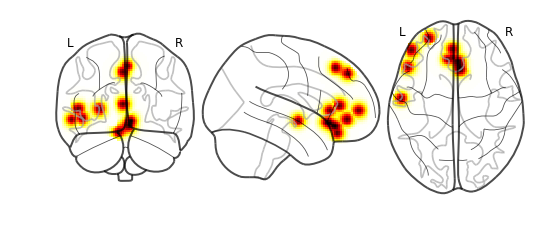

In [109]:
for i in np.arange(10):
    net_inds = largest_indices(np.atleast_2d(approximation_combined[i]).mean(axis=0), 10)
    temp_locs = centers[net_inds]
    temp_widths = widths[net_inds]
    w = rbf(temp_locs, temp_widths, template.get_locs().values)
    b = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)
    nii = se.Nifti(b)
    print('PCA = ' + str(i + 1))
    nii.plot_glass_brain()

In [111]:
w.shape

(10, 171094)

In [82]:
net_inds = largest_indices(np.atleast_2d(approximation_combined[0]).mean(axis=0), 10)

In [63]:
template = se.helpers._gray(res=2)
w = rbf(centers, widths, template.get_locs().values)

In [84]:
temp_locs = centers[net_inds]
temp_widths = widths[net_inds]
w = rbf(temp_locs, temp_widths, template.get_locs().values)
b = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)
nii = se.Nifti(b)
nii.plot_glass_brain()

In [135]:
newbrain = se.Brain(data=widths, locs=centers)

In [137]:
nii_b = se.Nifti(newbrain)

In [130]:
b = se.Brain(data=np.array(np.sum(w, axis=0), ndmin=2), locs=template.get_locs(), minimum_voxel_size=2)

In [131]:
nii = se.Nifti(b)

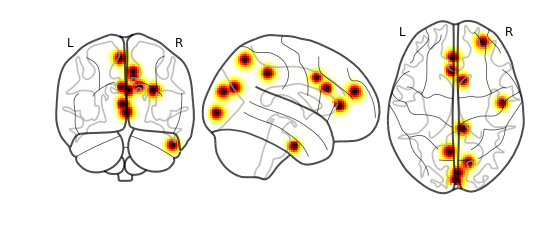

In [85]:
nii.plot_glass_brain()

In [15]:
# intact = hyp.describe(list(data[conds == 'intact']), reduce='PCA', show=False)
# paragraph = hyp.describe(list(data[conds == 'paragraph']), reduce='PCA', show=False)
# word = hyp.describe(list(data[conds == 'word']), reduce='PCA', show=False)
# rest = hyp.describe(list(data[conds == 'rest']), reduce='PCA', show=False)

/usr/local/lib/python3.6/site-packages/hypertools/tools/describe.py:61: UserWarning: When input data is large, this computation can take a long time.
  warnings.warn('When input data is large, this computation can take a long time.')


KeyboardInterrupt: 

In [ ]:
pca_pd = pd.DataFrame({'intact':intact['average'],'paragraph':paragraph['average'],'word':word['average'],'rest':rest['average']})


In [ ]:
pca_pd.head()

In [ ]:
pieman_conds

In [40]:

# max_dims = len(intact['average'])
# colors=['r', 'y', 'g', 'b']
# fig, ax = plt.subplots()
# for i, c in enumerate(pieman_conds):
#     print(i)
#     sns.tsplot(data=pca_pd[c], time=[n for n in range(2, max_dims+2)], color=colors[i], err_style="unit_traces", ax=ax)
# ax.set_title('Correlation with raw data by number of components')
# ax.set_ylabel('Correlation')
# ax.set_xlabel('Number of components')
# ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.75), ncol=1)
# plt.axhline(y=.9, c='k',linestyle='dashed',zorder=-1)
# plt.show()

NameError: name 'intact' is not defined

## pieman pca decoding

In [149]:
resultsdir = '/Users/lucyowen/Desktop/pca_env/pca_paper/pieman/results/pca_decode/PCA/ndims_100'

In [150]:
conds =glob.glob(os.path.join(resultsdir, '*.csv'))

In [151]:
conds

['/Users/lucyowen/Desktop/pca_env/pca_paper/pieman/results/pca_decode/PCA/ndims_100/intact.csv',
 '/Users/lucyowen/Desktop/pca_env/pca_paper/pieman/results/pca_decode/PCA/ndims_100/paragraph.csv',
 '/Users/lucyowen/Desktop/pca_env/pca_paper/pieman/results/pca_decode/PCA/ndims_100/rest.csv',
 '/Users/lucyowen/Desktop/pca_env/pca_paper/pieman/results/pca_decode/PCA/ndims_100/word.csv']

In [152]:
full_data = pd.DataFrame()
for c in conds:
    data = pd.read_csv(c)
    data['condition'] = os.path.basename(os.path.splitext(c)[0])

    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)

In [153]:
full_data

Unnamed: 0      rank  accuracy     error  dims  folds  iteration  \
0              0  0.763222  0.006667  0.458911     1      0          0   
1              0  0.705522  0.010000  0.333711     2      0          0   
2              0  0.773344  0.020000  0.321156     3      0          0   
3              0  0.765333  0.006667  0.315078     4      0          0   
4              0  0.852389  0.066667  0.230633     5      0          0   
5              0  0.877244  0.063333  0.203222     6      0          0   
6              0  0.895533  0.066667  0.192889     7      0          0   
7              0  0.933111  0.090000  0.149878     8      0          0   
8              0  0.937300  0.106667  0.133511     9      0          0   
9              0  0.937922  0.116667  0.142544    10      0          0   
10             0  0.952878  0.153333  0.116756    11      0          0   
11             0  0.953800  0.163333  0.124456    12      0          0   
12             0  0.955756  0.156667  0.121089    13      0          0   
13             0  0.958222  0.163333  0.094578    14      0          0   
14             0  0.959156  0.156667  0.097144    15      0          0   
15             0  0.963067  0.170000  0.111200    16      0          0   
16             0  0.965533  0.173333  0.094233    17      0          0   
17             0  0.972233  0.206667  0.054122    18      0          0   
18             0  0.974189  0.226667  0.052833    19      0          0   
19             0  0.974256  0.236667  0.054533    20      0          0   
20             0  0.974133  0.226667  0.053389    21      0          0   
21             0  0.977667  0.243333  0.047733    22      0          0   
22             0  0.978422  0.236667  0.045944    23      0          0   
23             0  0.977944  0.240000  0.045978    24      0          0   
24             0  0.983167  0.260000  0.042311    25      0          0   
25             0  0.983333  0.266667  0.042300    26      0          0   
26             0  0.983544  0.253333  0.045333    27      0          0   
27             0  0.983611  0.250000  0.044144    28      0          0   
28             0  0.983811  0.253333  0.044044    29      0          0   
29             0  0.984567  0.230000  0.047056    30      0          0   
...          ...       ...       ...       ...   ...    ...        ...   
5970           0  0.768067  0.070000  0.216889    71      1          9   
5971           0  0.768133  0.070000  0.216811    72      1          9   
5972           0  0.768489  0.073333  0.214300    73      1          9   
5973           0  0.767767  0.073333  0.214567    74      1          9   
5974           0  0.768011  0.073333  0.214567    75      1          9   
5975           0  0.767900  0.073333  0.216733    76      1          9   
5976           0  0.768756  0.080000  0.222533    77      1          9   
5977           0  0.768744  0.073333  0.223178    78      1          9   
5978           0  0.769078  0.076667  0.221622    79      1          9   
5979           0  0.768522  0.070000  0.221378    80      1          9   
5980           0  0.768667  0.076667  0.220389    81      1          9   
5981           0  0.768944  0.070000  0.222578    82      1          9   
5982           0  0.770489  0.070000  0.220456    83      1          9   
5983           0  0.770667  0.070000  0.221133    84      1          9   
5984           0  0.770611  0.070000  0.221122    85      1          9   
5985           0  0.771156  0.070000  0.220500    86      1          9   
5986           0  0.771833  0.070000  0.221156    87      1          9   
5987           0  0.772567  0.066667  0.220800    88      1          9   
5988           0  0.772400  0.066667  0.220078    89      1          9   
5989           0  0.771967  0.066667  0.221156    90      1          9   
5990           0  0.771456  0.070000  0.219322    91      1          9   
5991           0  0.771800  0.073333  0.216356    92      1          9   
5992      

In [154]:
full_data[full_data['condition']=='intact'].head()

Unnamed: 0      rank  accuracy     error  dims  folds  iteration condition
0           0  0.763222  0.006667  0.458911     1      0          0    intact
1           0  0.705522  0.010000  0.333711     2      0          0    intact
2           0  0.773344  0.020000  0.321156     3      0          0    intact
3           0  0.765333  0.006667  0.315078     4      0          0    intact
4           0  0.852389  0.066667  0.230633     5      0          0    intact

In [155]:
outfile = os.path.join(figdir, 'Accuracy_by_components.pdf')

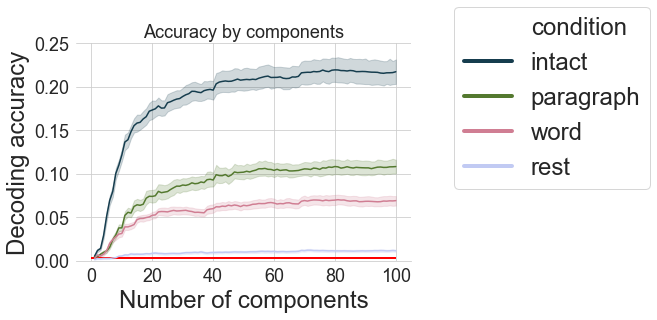

In [157]:
fig, ax = plt.subplots()
sns.lineplot(x="dims", y="accuracy",
             hue="condition",
             data=full_data, ax=ax, palette="cubehelix", hue_order=['intact', 'paragraph', 'word', 'rest'])
sns.despine(ax=ax, left=True)
ax.set_title('Accuracy by components')
ax.set_ylabel('Decoding accuracy',fontsize=24)
ax.set_xlabel('Number of components',fontsize=24)
ax.set_ylim(0, .25)
ax.hlines(y=1/300, xmin=0, xmax=100, linewidth=2, color='r')
#ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.75), ncol=1)
l = ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.75), ncol=1,fontsize=24)
for line in l.get_lines():
    line.set_linewidth(4.0)
fig.savefig(outfile, bbox_inches='tight')

In [50]:
resultsdir = '/Users/lucyowen/Desktop/pca_env/pca_paper/pieman/results/pca_decode_chunked/PCA/ndims_100'

In [51]:
conds =glob.glob(os.path.join(resultsdir, '*.csv'))

In [52]:
full_data = pd.DataFrame()
for c in conds:
    data = pd.read_csv(c)
    data['condition'] = os.path.basename(os.path.splitext(c)[0])

    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)

In [53]:
full_data[full_data['condition']=='intact'].head()

Unnamed: 0      rank  accuracy     error  dims  folds  iteration  third  \
0           0  0.835978  0.010000  0.486389     1      0          1      0   
1           0  0.755456  0.010000  0.345556     2      0          1      0   
2           0  0.777344  0.016667  0.288767     3      0          1      0   
3           0  0.853167  0.093333  0.230400     4      0          1      0   
4           0  0.896922  0.100000  0.229467     5      0          1      0   

  condition  
0    intact  
1    intact  
2    intact  
3    intact  
4    intact

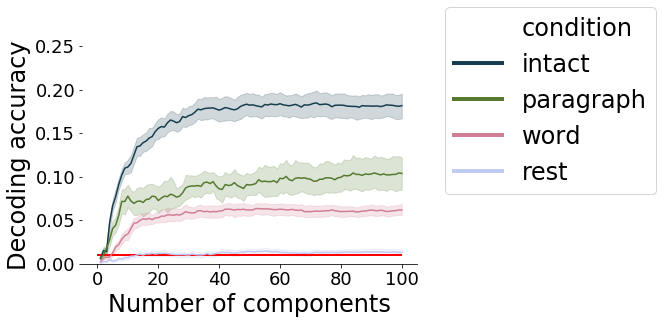

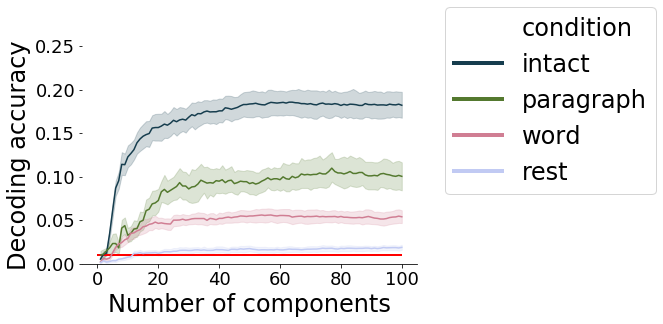

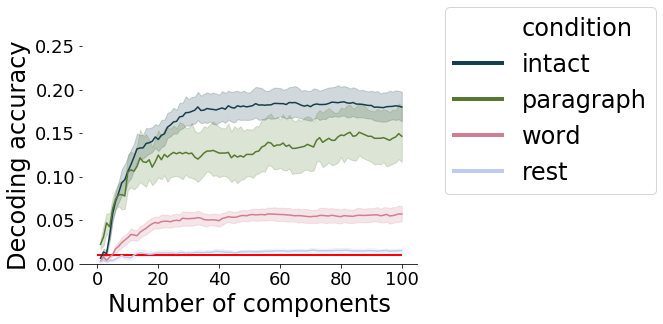

In [54]:
for i in range(3):
    outfile = os.path.join(figdir, 'Accuracy_by_components_third_' + str(i) + '.pdf')
    fig, ax = plt.subplots()
    sns.lineplot(x="dims", y="accuracy",
                 hue="condition",
                 data=full_data[full_data['third']==i], ax=ax, palette="cubehelix", hue_order=['intact', 'paragraph', 'word', 'rest'])
    sns.despine(ax=ax, left=True)
    #ax.set_title('Accuracy by components for third: ' + str(i + 1))
    ax.set_ylabel('Decoding accuracy',fontsize=24)
    ax.set_xlabel('Number of components',fontsize=24)
    ax.set_ylim(0, .25)
    ax.hlines(y=1/100, xmin=0, xmax=100, linewidth=2, color='r')
    l = ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.75), ncol=1,fontsize=24)
    for line in l.get_lines():
        line.set_linewidth(4.0)
    fig.savefig(outfile, bbox_inches='tight')